In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [3]:
from dateutil import parser


In [4]:
ufo = pd.read_csv("scrubbed.csv")

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## cleaning up the 'datetime' feature
- it has both '24:00' and '00:00' values
- but only 00:00 are relevant
- so we find them and replace with "00:00"

In [5]:
row = -1
counter = 0
for i in ufo['datetime']:
    row += 1
    date, time_stamp = i.split()
    if time_stamp == '24:00':
        counter += 1
        ufo.iloc[row, 0] = " ".join([date, "00:00"])
    

In [6]:
counter

694

In [7]:
ufo['datetime'] = pd.to_datetime(ufo['datetime'])

In [8]:
ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [9]:
# ufo.drop(['datetime'], axis=1, inplace=True)

In [10]:
ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


## TONOTES: Accessor object for datetimelike properties of the Series values.


- using dt attr of the Series obj
- extracting months, years, days etc


In [11]:
ufo['month'] = ufo['datetime'].dt.month.astype(int)

In [12]:
ufo['year'] = ufo['datetime'].dt.year.astype(int)

In [13]:
ufo['day'] = ufo['datetime'].dt.day.astype(int)

In [14]:
ufo['day of the week'] = ufo['datetime'].dt.dayofweek.astype(int)

In [15]:
ufo['hour'] = ufo['datetime'].dt.hour.astype(int)

In [16]:
ufo['day of year'] = ufo['datetime'].dt.strftime('%m-%d')

In [17]:
temp = ufo['day of the week'].value_counts()

In [18]:
temp.sort_index(inplace=True)

<BarContainer object of 7 artists>

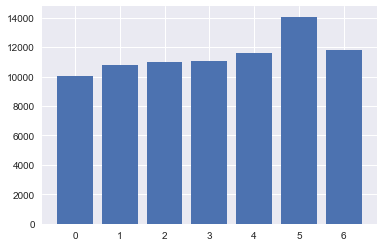

In [32]:
plt.bar(temp.index, temp)

In [1]:
sns.countplot(temp)

NameError: name 'sns' is not defined

In [25]:
ufo.head(1)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,month,year,day,day of the week,hour,day of year
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,10,1949,10,0,20,10-10


In [43]:
temp = ufo['month'].value_counts()

In [44]:
temp.sort_index(inplace=True, ascending=False)

In [47]:
temp

12    5665
11    6739
10    7407
9     7589
8     8636
7     9520
6     8152
5     5293
4     5527
3     5450
2     4665
1     5689
Name: month, dtype: int64

(0, 9762.75)

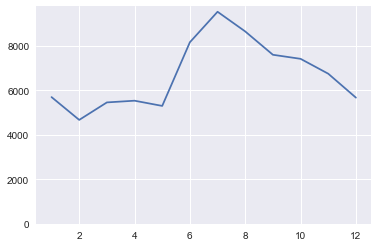

In [50]:
plt.plot(temp)
plt.ylim(0)

(0, 9762.767706033848)

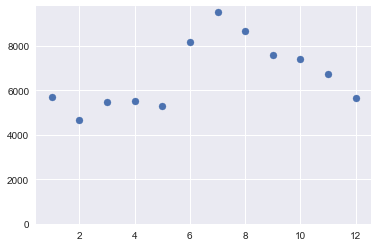

In [51]:
plt.scatter(temp.index, temp)
plt.ylim(0)

<BarContainer object of 12 artists>

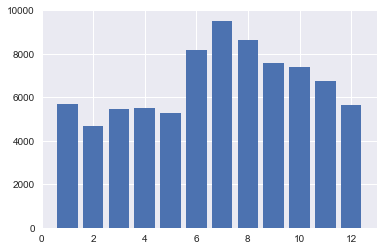

In [49]:
plt.bar(temp.index, temp)

In [53]:
temp = ufo['day'].value_counts()

In [58]:
temp.sort_index(inplace=True)

In [59]:
temp

1     5586
2     2194
3     2352
4     3128
5     2488
6     2322
7     2399
8     2302
9     2182
10    2912
11    2310
12    2588
13    2489
14    2456
15    5968
16    2424
17    2287
18    2291
19    2357
20    3046
21    2240
22    2317
23    2285
24    2303
25    2429
26    2045
27    2042
28    2283
29    1997
30    2572
31    1738
Name: day, dtype: int64

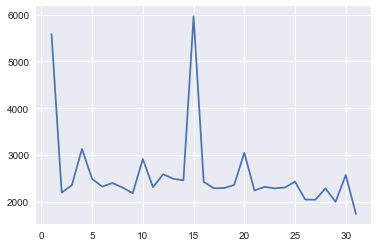

In [60]:
plt.plot(temp)

<BarContainer object of 31 artists>

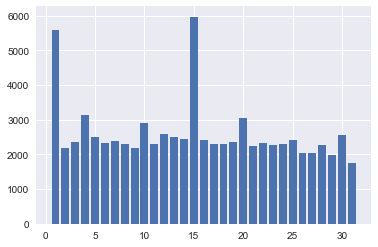

In [61]:
plt.bar(temp.index, temp)

## here's some way to pivot using time series
https://stackoverflow.com/questions/38621652/pandas-pivot-time-series-by-year

## this how to return day of the week
- use it to create day of the week feature
- use loop to collect week days 
- then just assign new feature
df[new] = list_of_weekdays

In [22]:
date = parser.parse("4th of July, 2015")
date

date.strftime('%A')


'Saturday'

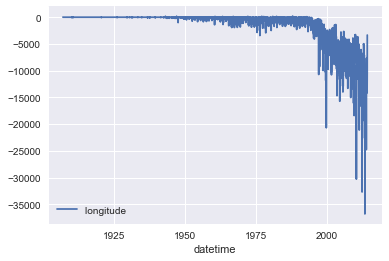

In [21]:
ufo.resample('W').sum().plot()
